# CHEM 60 - January 31st, 2024 (Statistics of Repeated Measurements)

This course is all about the quantitative. When we think of numerical results, whether they come from simulation or were measured in the lab, without a notion of error, uncertainty, or confidence, it's hard to assign much meaning to them. I would argue that no quantitative result without some associated error estimate (and I am using the word 'error' here rather broadly) is meaningful. Some methods (and research questions) are more amenable to simple error analysis than others (What kinds of error or uncertainty could we apply to the energies you calculated on Monday?).

We will talk through some error terminology first so we can get at the notion of statistics relevant for repeated measurements.

To get started, click on '**File**' in the left menu, then '**Save a copy in Drive**' to ensure you are editing *your* version of this assignment (if you don't, your changes won't be saved!). After you click '**Save a copy in Drive**' a popup that says **Notebook copy complete** should appear, and it may ask you to <font color='blue'>**Open in a new tab**</font>. When open, your new file will be named `Copy of CHEM60_Class_4_SP24_Statistics_of_Repeated_Measurements.ipynb` (you may want to rename it before/after you move it to your chosen directory).

# Imports

Here are the Python imports that we will need today. A tiny bit of default formatting is thrown in here (I like my font sizes to be larger than the default settings).

Run the below code block to get started.

In [179]:
# Standard library imports
import math as m

# Third party imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# This part of the code block is telling matplotlib to make certain font sizes exra, extra large by default
# Here is where I list what parametres I want to set new defaults for
params = {'legend.fontsize': 'xx-large',
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
# This line updates the default parameters of pyplot (to use our larger fonts)
plt.rcParams.update(params)

First, mount the Drive. You hopefully remember this from week 0. We will look at some data in the second half of this tutorial (the same data set you'll be working on with your homework), so we need access to the Shared Drive where I put the data. If the details of things like imports or data access need to be clarified, go back and check out the [class 0](https://colab.research.google.com/drive/1q96pdc5CBfjhqkALe-ohqPJwNMcXzwqS?usp=share_link) notebook on this.

In [180]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Assuming you ended up with `Mounted at /content/gdrive`, you're good to move on!

# Measurement Error

Today, we are going to talk about a narrow meaning of the word error - the kind we typically associate with measurements. Let's say we were the kind of chemists who study novel natural products from plants. We've done our sample prep for some rare plant with suspected pharmacokinetic effects and run our cleaned-up sample through a GC-MS (to figure out all the different molecules in our sample). We see all sorts of things we expect in the mass-spec (compounds our library recognizes, well-known plant-stuff) and something new our library doesn't seem to recognize. Something came off the column at a weird time with a mass-to-charge ratio we weren't expecting. Say we measured a mass-to-charge ratio of 537, and absolutely no molecules we know here make sense with that mass and retention time (to be found in a plant). Does this mean we stumbled upon a new substance? Should we start daydreaming about what our cover of Nature will look like (obviously, a stylized photo of the rare plant in its natural ecosystem with this cool new molecule artfully superimposed on top)? Surely not, because many experimental things need to be checked first. An easy first question to ask - what is the resolution of our mass-spec? If it can differentiate between 0.001 mass units, and we really found exactly 537.00 m/z, we still might want to double-check our sample prep and column choice before getting too excited, but we might be able to feel confident we found an unexpected mass at least (even if we can't know yet that it's a new molecule). If our mass spec has a low mass resolution (say it's only good to ±1 m/z), then we really found something at 537±1 m/z (and then maybe we just saw lycopene) and uhh should have made a better instrumental choice before designing this experiment. Without this notion of a value plus or minus some error or uncertainty, choosing the right instrument,  the right kind of experiment would basically be impossible.

Let's say you all did an experiment in the lab to measure the density of water with different kinds of glassware (hey, those of you who did CHEM24 last semester did this!).

The below code will create a table (a pandas data frame) that contains measurements (from my section of CHEM24 last semester!) for the density of water.

In [181]:
exp1_data = {'Beaker (g/mL)': [1.000, 0.895, 0.633, 0.73, 0.76, 0.78, 0.88, 1.000, 0.95],
        'Graduated Cylinder (g/mL)': [0.9, 0.961, 0.914, 0.93, 0.97, 0.937, 0.957, 0.93, 0.95],
        'Burette (g/mL)': [1.0000, 0.984, 1.003, 0.9, 0.9983, 0.995, 0.995, 0.9986, 0.993]}

labels = ['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H', 'Group I']

# let's put the data in a pandas object
exp1_df = pd.DataFrame(exp1_data, index=labels)
exp1_df # and view it

,Beaker (g/mL),Graduated Cylinder (g/mL),Burette (g/mL)
Group A,1.000,0.900,1.0000
Group B,0.895,0.961,0.9840
Group C,0.633,0.914,1.0030
Group D,0.730,0.930,0.9000
Group E,0.760,0.970,0.9983
Group F,0.780,0.937,0.9950
Group G,0.880,0.957,0.9950
Group H,1.000,0.930,0.9986
Group I,0.950,0.950,0.9930


In experimental science, we are often concerned with **random** and **systematic** errors. Another category of error that gets less attention (gross errors) is pretty straightforward: something experiment-ruining occurs, and you just toss the whole thing out and try again. Random and systematic errors don't mean you throw the entire thing out, but minimizing those two types helps us make choices in experiment design (there is a modelling equivalent of this we will talk about later).

Nine groups of students each conducted an experiment to measure the density of water using different glassware. Looking at the Burette, we can see the results are all similar, mostly ranging between 0.9840 and 1.0030 g/mL. In common terms, the results are **repeatable**. Second, most of the results are slightly below 1.00 g/mL (and the expected value is a tiny bit below 1 g/mL). So we would call the Burette **precise** (because it is fairly repeatable) and reasonably **unbiased** (they are a tiny bit lower on average than expected, but not majorly). The Beaker, on the other hand, has a large spread in values (it does not seem very repeatable) and many values are much lower than expected (so it is **imprecise** and **biased** low).

These results indicate two different types of errors. Firstly, random errors account for variations in replicated results, affecting the experiment's precision or repeatability. Here, the Burette measurements indicate that random errors are minor, showing that the results are precise. Secondly, systematic errors, which veer all the results in a similar way (each being marginally lower), contribute to the total systematic error or the bias of the measurement.

These results were interpreted based on two parameters - the average value and the extent of spread. The average value we calculated is what is known as the arithmetic mean (often written as $\bar{x}$). $\bar{x}$ is derived from the total sum of all recorded measurements, $\sum x_i$, divided by the total number of measurements, $n$.

# The First Moment: Mean
$$ \bar{x} = \frac{\sum x_i}{n} $$

Moment? If this terminology is new, enjoy! In statistics, some measures are referred to as "moments" because they are derived from the concept of moments in physics. In a physical sense, moments represent the distribution of mass in a body around an axis. Similarly, in statistics, moments describe the distribution of data values around certain points. The first moment is the mean, representing the "balance" point of the data (*sort of*). The second moment is the variance, showing how widely the data is spread from the mean. The third and fourth moments are skewness and kurtosis, respectively, providing information on the shape of the distribution. These "moments" help in understanding the key characteristics of a data distribution.

Standard deviation, $s$, is a statistical measure that describes the dispersion or variation in a data set. In simple terms, it illustrates how much individual data points in a set vary from the mean value. The more the data points differ from the mean, the greater the standard deviation will be, indicating a wide spread of data. Conversely, a low standard deviation implies that the data points are closely clustered around the mean, indicating a narrow spread of data.

# Standard Deviation
$$s = \sqrt\frac{\sum \left( x_i -\bar{x}\right)^2}{n-1} $$

This version of the standard deviation is usually referred to as the **Sample Standard Deviation**. This differentiates it from the Population Standard Deviation, which often gets the symbol $\sigma$.

## Population Standard Deviation
$$\sigma = \sqrt\frac{\sum \left( x_i -\bar{x}\right)^2}{n} $$

If you know you have measured the "entire population" (i.e., you're pretty sure you've taken enough measurements to have captured well whatever the thing you are describing), this is the version to use. You use the Sample Standard deviation, $s$, when you know your measurements are just a sample (like a snapshot) of a large population (you could have measured the thing many more times than you actually did).

General rule of thumb, pick the Sample Standard Deviation if n is small, and Population Standard Deviation if n is large. If n is very small (like our example above), even the Sample Standard Deviation doesn't tell you all that much (as you'll see below).

The next entirely related quantity to know the name of is variance, which is just the square of the standard deviation. We'll use this more in a bit to give it meaning.
#The Second Moment: Variance
\begin{align}
\text{Variance}=s^2 \text{ or } \sigma^2
\end{align}

Variance again depends on how exhaustive the dataset is that we are looking at (a fairly complete picture, or just a sample of something larger).

We can demonstrate calculating these statistics by writing tiny functions to do so (`numpy` and `pandas` also have these built in, but they're easy to write ourselves).

In [182]:
def mean_function(data):
  n = len(data)
  mean = sum(data)/n
  return mean

def standard_deviation_function(data):
  n = len(data)
  mean = mean_function(data)
  variance = sum((xi - mean) ** 2 for xi in data) / (n - 1)
  return m.sqrt(variance)

Experimental results rarely hold much value unless accompanied by an estimate of the involved errors. A widely accepted practice is to use the mean to estimate the measured quantity and the standard deviation to estimate precision. This makes good sense **if** measured values are clustered around a mean (which, in a well designed experiment, should be the 'true' value). **Many types of repeated measurements do not actually cluster around a mean in a 'normal' way.** Other statistical moments can be more illustrative than just variance in those cases.

An important aspect of presenting results is rounding the numbers to the correct significant figures. Typically, that means you include all certain numbers plus the first uncertain one. Here is an example.

In [183]:
print("For the density of water experiment:")
print("With the beaker, they found a mean of",round(mean_function(exp1_df['Beaker (g/mL)']),1),"g/mL","with a standard deviation of",round(standard_deviation_function(exp1_df['Beaker (g/mL)']),1),"g/mL, n =",len(exp1_df['Beaker (g/mL)']))
print("With the graduated cylinder, they found a mean of",round(mean_function(exp1_df['Graduated Cylinder (g/mL)']),2),"g/mL","with a standard deviation of",round(standard_deviation_function(exp1_df['Graduated Cylinder (g/mL)']),2),"g/mL, n =",len(exp1_df['Graduated Cylinder (g/mL)']))
print("With the burette, they found a mean of",round(mean_function(exp1_df['Burette (g/mL)']),2),"g/mL","with a standard deviation of",round(standard_deviation_function(exp1_df['Burette (g/mL)']),2),"g/mL, n =",len(exp1_df['Burette (g/mL)']))

For the density of water experiment:
With the beaker, they found a mean of 0.8 g/mL with a standard deviation of 0.1 g/mL, n = 9
With the graduated cylinder, they found a mean of 0.94 g/mL with a standard deviation of 0.02 g/mL, n = 9
With the burette, they found a mean of 0.99 g/mL with a standard deviation of 0.03 g/mL, n = 9


# PRACTICE QUESTION: How different are these numbers if we used the population standard deviation?

Try it out! Write a new function for the population standard deviation and use it.


---



In [ ]:
# Code here!



---



While standard deviation provides a measure of spread (or deviation) from the mean value, it doesn't offer insights into the data distribution. Let's look at some histograms of the above data to see what I mean.

# Histograms

A histogram is a graphical representation of the distribution of a dataset. To construct a histogram, the first step is to "bin" the range of values; that is, divide the entire range of values into a series of intervals and then count how many data points fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. We are letting matplotlib make the histogram for us with [`hist`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) (that actually just calls the histogram function from `numpy`).

The vertical axis of a histogram represents the count of data points that fall within the range of each specific bin, while the horizontal axis represents the bins or ranges of data values. The bins are often determined by the data range and the desired level of resolution.

We use histograms for several reasons. Primarily, they provide a visual interpretation of numerical data by indicating the number of data points that lie within a range of values, known as a class or a bin. They give a clear summary of the data distribution, and they're an invaluable tool when it comes to identifying patterns, trends, outliers, or skewness in the data. A histogram can help us understand where most values are concentrated and estimate the probability of a certain value's occurrence. They also let us quickly check if our data is normally distributed or not.

Below, we have code to make histograms for each piece of equipment. I have plotted the mean and standard deviation ontop.

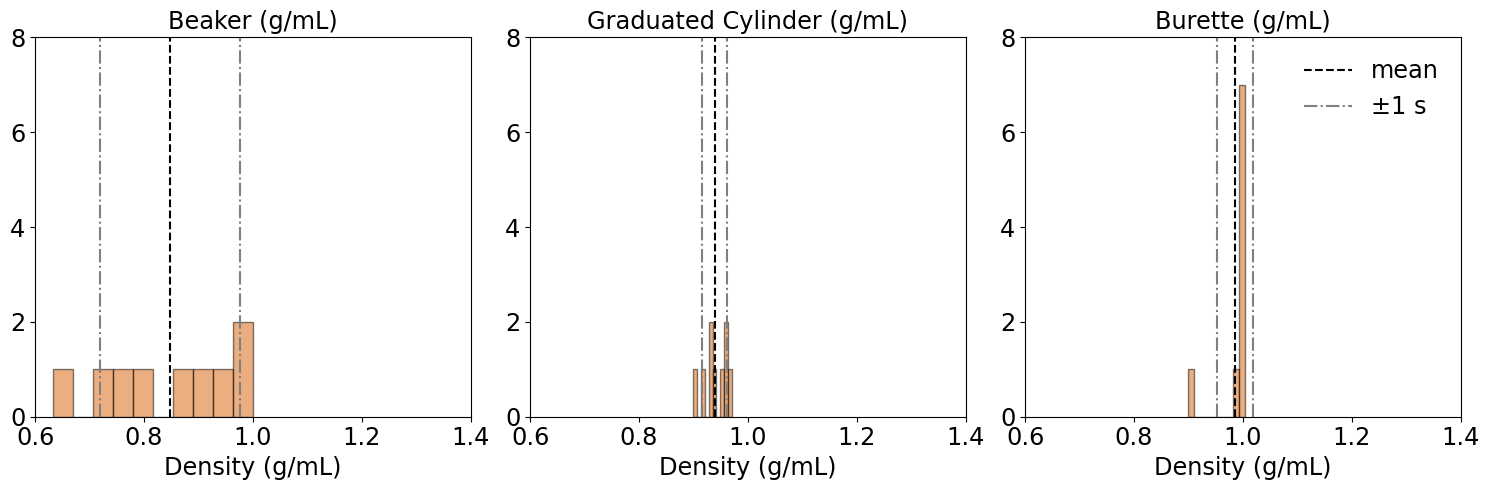

In [184]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Iterate over each column and plot
for i, column in enumerate(['Beaker (g/mL)', 'Graduated Cylinder (g/mL)', 'Burette (g/mL)']):
    mean = mean_function(exp1_df[column])
    stddev = standard_deviation_function(exp1_df[column])

    # Create histogram for the column
    axs[i].hist(exp1_df[column], bins=10, alpha=0.5, facecolor='#d95f02', edgecolor='black', align='mid')

    # Add mean to the plot
    axs[i].axvline(mean, color='k', linestyle='--', label="mean")

    # Add standard deviation to the plot
    axs[i].axvline(mean - stddev, color='grey', linestyle='-.', label="±1 s")
    axs[i].axvline(mean + stddev, color='grey', linestyle='-.')
    axs[i].set_title(column)

    # these are hard coded! They don't need to be, but this saves a bit of code you don't need right now
    axs[i].set_ylim([0, 8])
    axs[i].set_xlim([.6, 1.4])

    axs[i].set_xlabel('Density (g/mL)')

plt.legend(frameon=False)
# Show the plot
plt.tight_layout()  # to adjust space between plots
plt.show()

You will notice a couple of things. I let the bin sizes vary for the different experimental setups (because their relative precision was so different). These also don't really look like... distributions. Could we say we had a normal distribution? Nope. This requires a lot more data than just the one class I plotted here. What if we had five classes of data?.

In [ ]:
# Generate the data for this dataframe
ex1_all_data = {
    'Beaker (g/mL)': [0.81, 0.87, 0.79, 0.98, 0.75, 0.85, 0.89, 0.81, 0.94, 0.80, 0.75, 1.000, 0.895,0.633, 0.73, 0.76, 0.78, 0.88, 1.000, 0.95, 0.96, 0.87, 0.69, 0.72, 0.76, 0.92,0.94, 0.77, 0.82, 0.93, 0.8, 0.9, 0.93, 0.62, 1, 0.69, 0.85, 0.86, 0.95, 0.81,0.83, 0.98, 0.71, 0.8432, 0.71, 0.73, 0.88, 0.86, 0.94, 0.91],
    'Graduated Cylinder (g/mL)': [0.948, 0.95, 0.954, 0.969, 0.919, 0.93, 0.95, 0.929, 0.965, 0.93, 0.95,0.9, 0.961, 0.914, 0.93, 0.97, 0.937, 0.957, 0.93, 0.95, 0.934, 0.947,0.88, 0.99, 0.951, 0.96, 0.96,0.926, 0.97, 0.94, 0.924, 0.934, 0.96,0.912, 0.946,0.95, 0.944, 0.943, 0.966, 0.987, 0.97, 0.961, 0.93, 0.9873,0.936, 1.1, 0.954, 0.951, 0.95, 0.928],
    'Burette (g/mL)': [0.9990, 0.9877, 0.994, 0.996, 0.9935, 0.99, 0.9699, 1.0009, 0.9813, 0.99, 0.9849,1.0000, 0.984, 1.003, 0.9, 0.9983, 0.995, 0.995, 0.9986, 0.993, 0.9990, 0.9951, 0.990, 0.91, 1.002, 1, 0.99, 0.9855, 0.9980, 0.9981, 0.988, 0.997, 1.02, 1, 0.992, 0.9860,0.985, 0.9964, 1.001, 0.9952, 0.97, 0.994, 1.01, 1.0009, 0.99, 1.03, 0.99, 1.002, 0.956, 0.9755]}

# Generate the labels for this dataframe
labels = [f'Monday {chr(65+i)}' for i in range(11)] + [f'Tuesday {chr(65+i)}' for i in range(9)] + [f'Wednesday {chr(65+i)}' for i in range(8)] + [f'Thursday {chr(65+i)}' for i in range(10)] + [f'Friday {chr(65+i)}' for i in range(12)]

# Create the DataFrame
exp1_all_df = pd.DataFrame(ex1_all_data, index=labels)

How have our basic stats changed now?

In [ ]:
print("For our density of water experiment:")
print("With the beaker, we found a mean of",round(mean_function(exp1_df['Beaker (g/mL)']),1),"g/mL","with a standard deviation of",round(standard_deviation_function(exp1_all_df['Beaker (g/mL)']),1),"g/mL, n =",len(exp1_all_df['Beaker (g/mL)']))
print("With the graduated cylinder, we found a mean of",round(mean_function(exp1_df['Graduated Cylinder (g/mL)']),2),"g/mL","with a standard deviation of",round(standard_deviation_function(exp1_all_df['Graduated Cylinder (g/mL)']),2),"g/mL, n =",len(exp1_all_df['Graduated Cylinder (g/mL)']))
print("With the burette, we found a mean of",round(mean_function(exp1_df['Burette (g/mL)']),2),"g/mL","with a standard deviation of",round(standard_deviation_function(exp1_all_df['Burette (g/mL)']),2),"g/mL, n =",len(exp1_all_df['Burette (g/mL)']))

Now let's check out the updated historgram.

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Iterate over each column and plot
for i, column in enumerate(['Beaker (g/mL)', 'Graduated Cylinder (g/mL)', 'Burette (g/mL)']):
    mean = mean_function(exp1_all_df[column])
    stddev = standard_deviation_function(exp1_all_df[column])

    # Create histogram for the column
    axs[i].hist(exp1_all_df[column], bins=10, alpha=0.5, facecolor='#d95f02', edgecolor='black', align='mid')

    # Add mean to the plot
    axs[i].axvline(mean, color='k', linestyle='--')

    # Add standard deviation to the plot
    axs[i].axvline(mean - stddev, color='grey', linestyle='-.')
    axs[i].axvline(mean + stddev, color='grey', linestyle='-.')
    axs[i].set_title(column)

    # these are hard coded! They don't need to be, but this saves a bit of code you don't need right now
    axs[i].set_ylim([0, 30])
    axs[i].set_xlim([.6, 1.4])
    axs[i].set_xlabel('Density (g/mL)')


# Show the plot
plt.tight_layout()  # to adjust space between plots
plt.show()

These honestly still don't look great, but we can see more clear clustering around a mean for at least two of the three types of glassware (and also perhaps some sense of outliers).

What was I looking for when I plotted this? If I want a dataset that is well characterized by a mean and standard deviation (or variance), I am often imagining a normal distribution. If I want just those two numbers to tell me the measurement and my confidence in the measurement, I need a symmetric distribution, at least.

A normal distribution, often called a Gaussian distribution, is a type of continuous probability distribution for a real-valued random variable. In a normal distribution, data is symmetrically distributed around the mean, implying that *most* of the data points are close to the average value. This distribution pattern indicates that the mean, median, and mode of the data are equal (for a large enough dataset), which often gives us confidence that we are centred on a 'true' value. What should a normal distribution look like?

Let's make a fake one below using numpy's [`random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) (a pseudorandom number generator that creates numbers following a normal distribution).

Every time you run the below code, the figure will look a little different. Run it several times to see how it changes.

In [ ]:
# Generate normally distributed random numbers
fake_measurement = np.random.normal(1, .1, 10000)

# Now the plot
fig, ax = plt.subplots(figsize=(6, 4))

# our basic stats
mean = np.mean(fake_measurement)
stddev = np.std(fake_measurement)

# Create histogram for the data
ax.hist(fake_measurement, bins=10, alpha=0.5, facecolor='#d95f02', edgecolor='black', align='mid')

# Add mean to the plot
ax.axvline(mean, color='k', linestyle='--')

# Add standard deviation to the plot
ax.axvline(mean - stddev, color='grey', linestyle='-.')
ax.text(mean, ax.get_ylim()[1]*0.9, 'Mean', rotation=90, fontsize=14, ha='right', va='center')
ax.axvline(mean + stddev, color='grey', linestyle='-.')
ax.text(mean - stddev, ax.get_ylim()[1]*0.8, '-1 $s$', fontsize=14, rotation=90, ha='right', va='center')
ax.text(mean + stddev, ax.get_ylim()[1]*0.8, '+1 $s$', fontsize=14, rotation=90, ha='right', va='center')
ax.set_title('Histogram of Fake (Normally Distributed) Measurements \n n='+str(len(fake_measurement)))

ax.set_xlim([.6, 1.4])
ax.set_xlabel('Fake density (g/mL)')

plt.tight_layout()
plt.show()

For a normal distribution with mean and standard deviation s:
*   approximately 68% of the population values lie within ±ls of the mean;
*   approximately 95% of population values lie within ±2s of the mean;
*   approximately 99.7% of population values lie within ±3s of the mean.

If we were conducting an experiment to measure some true value, we'd probably feel pretty good about our mean value being 'the truth' (or at least useful).

What if we only had 50 measurements, though, like we did with the class data above? **Run this one several times too!**

In [ ]:
# Generate normally distributed random numbers
fake_measurement = np.random.normal(1, .1, len(exp1_all_df))

fig, ax = plt.subplots(figsize=(6, 4))

mean = np.mean(fake_measurement)
stddev = np.std(fake_measurement)

# Create histogram for the data
ax.hist(fake_measurement, bins=10, alpha=0.5, facecolor='#d95f02', edgecolor='black', align='mid')

# Add mean to the plot
ax.axvline(mean, color='k', linestyle='--')

# Add standard deviation to the plot
ax.axvline(mean - stddev, color='grey', linestyle='-.')
ax.text(mean, ax.get_ylim()[1]*0.9, 'Mean', rotation=90, fontsize=14, ha='right', va='center')
ax.axvline(mean + stddev, color='grey', linestyle='-.')
ax.text(mean - stddev, ax.get_ylim()[1]*0.8, '-1 $\sigma$', fontsize=14, rotation=90, ha='right', va='center')
ax.text(mean + stddev, ax.get_ylim()[1]*0.8, '+1 $\sigma$', fontsize=14, rotation=90, ha='right', va='center')
ax.set_title('Histogram of Fake (Normally Distributed) Measurements \n n='+str(len(fake_measurement)))

ax.set_xlim([.6, 1.4])
ax.set_xlabel('Fake density (g/mL)')

plt.tight_layout()
plt.show()

Okay. So if you've run this several times, you might notice that, just like our experimental data, this doesn't look all that normally distributed (at least, many of the times I ran it). BUT, the values are actually being drawn from a normal distribution! if n is small, characterizing the shape of a distribution is hard! Why might it be essential to do this?

#The Third Moment: Skew

Skewness measures the symmetry, or lack thereof, of a distribution. A positive skew indicates that the tail on the right side is longer or fatter than the left side. On the other hand, a negative skew suggests a long tail on the left side. If the skewness is zero, the data is perfectly symmetrical. The formula for skewness is
$$ \text{Skew} = \frac{n}{(n-1)(n-2)}\sum{\left(\frac{x_i-\bar{x}}{s}\right)}^3 $$

where $n$ is the number of data points, $x_i$ are the individual data points, $\bar{x}$ is the mean, and $s$ is the standard deviation.

# The Fourth Moment: Kurotsis

Kurtosis measures the "tailedness" of the probability distribution. It compares the amount of data near the mean versus those far away (in the tails). Kurtosis is defined as:

$$ \text{Kurtosis} = \frac{n(n+1)}{(n-1)(n-2)(n-3)}\sum{\left(\frac{x_i-\bar{x}}{s}\right)}^4 - \frac{3(n-1)^2}{(n-2)(n-3)} $$

where other variables are the same as those in the skewness formula.

These are useful statistical measures because they give us a quantitative measure of the shape of the probability distribution of the dataset. While the mean and variance tell us where most of the data is centered and how much it varies, skewness tells us the direction and degree of asymmetry, and kurtosis tells us how heavy the tails are (essential for looking at data that isn't normally distributed, or data that we just can't know the underlying distribution because we can't take that many measurements).



# Median / Percentiles

While these aren't "moments", the percentiles are another powerful way to describe a dataset.

The "median" is a measure of central tendency in statistics, which separates a given data set into two equal halves. If you were to sort all data points from smallest to largest, the median would be the value that falls exactly in the middle. In a dataset with an odd number of observations, the median is the single middle value. In a set with an even number of observations, the median is the arithmetic mean of the two middle values. The median is a useful measure when dealing with skewed distributions as it is less affected by outliers or extreme values.

Percentiles, on the other hand, are measures that divide a dataset into 100 equal parts. They are useful in understanding the distribution of data points. For instance, the 25th percentile (also known as the first quartile) is the point below which 25% of the observations fall, the 50th percentile (the median) is the point below which 50% of the observations fall, and the 75th percentile (third quartile) is the point below which 75% of the observations fall. Percentiles can provide insights into the spread and skewness of the data, and are particularly useful in comparing data points or sets.

# The Range

The final basic stats term to have in mind is Range. The term "range" usually refers to the difference between the maximum and minimum values in a given dataset (sometimes people will say Range and state the min and max values, rather than the difference). It is another measure of dispersion or spread that indicates how far apart the most extreme observations are from each other. For instance, in a dataset with values 2, 4, 6, 8, and 10, the range would be 10 - 2 = 8. While the range can give us a sense of the breadth of values in the dataset, it does not provide any information about the central tendency, such as the mean or median, and it can be highly affected by outliers, or extreme values at either end of the dataset.

We will come back to these later. Let's look at a more interesting dataset now.

# Swarming with Data
Okay, it isn't really a swarm of data (the dataset isn't all that big), but I wanted a bee pun...

In our first (0th) class, I asked you to find interesting papers to share the computing and chemistry in them. Carter, Arjun, and Fia found an interesting paper by [Nicholson and Knapp et al.](https://www.nature.com/articles/s41586-023-06773-3) published last year in Nature, and they shared this [figure](https://www.nature.com/articles/s41586-023-06773-3/figures/1) with us:


![Fig. 1: Effects of landscape exposure to pesticides on bumble bee colony weight and production.](https://media.springernature.com/full/springer-static/image/art%3A10.1038%2Fs41586-023-06773-3/MediaObjects/41586_2023_6773_Fig1_HTML.png?as=webp)

Some basic stats are being presented here. Let's load the data they used to make this figure and work through it ourselves.

Below, we'll read in their dataset.


In [ ]:
NicholsonKnapp_etal_2023 = pd.read_csv('/content/gdrive/Shared drives/Chem_60_Spring_2024/In_Class_Notebooks/data/class4_NicholsonKnapp_etal_2023_BombusPesticideEffects.csv', index_col=0)

If you ran the above, let's look at it!

In [ ]:
NicholsonKnapp_etal_2023

Okay, so we have 316 data points and each data point has 17 different pieces of information associated with it. The plot we are focussing on was all about Pesticide Risk (specifically, they are using this 'log centred' risk factor they discuss in the methods section). Let's make a histogram!

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

mean = np.mean(NicholsonKnapp_etal_2023['pesticideRisk_log_centered'])
stddev = np.std(NicholsonKnapp_etal_2023['pesticideRisk_log_centered'])

# Create histogram for the data
ax.hist(NicholsonKnapp_etal_2023['pesticideRisk_log_centered'], bins=20, alpha=0.5, facecolor='#d95f02', edgecolor='black', align='mid')

# Add mean to the plot
ax.axvline(mean, color='k', linestyle='--')

# Add standard deviation to the plot
ax.axvline(mean - stddev, color='grey', linestyle='-.')
ax.text(mean, ax.get_ylim()[1]*0.9, 'Mean', rotation=90, fontsize=14, ha='right', va='center')
ax.axvline(mean + stddev, color='grey', linestyle='-.')
ax.text(mean - stddev, ax.get_ylim()[1]*0.8, '-1 $s$', fontsize=14, rotation=90, ha='right', va='center')
ax.text(mean + stddev, ax.get_ylim()[1]*0.8, '+1 $s$', fontsize=14, rotation=90, ha='right', va='center')
ax.set_title('Histogram of Nicholson and Knapp et al Pesticide Risk')

ax.set_xlabel('Pesticide risk')
plt.tight_layout()
plt.show()

Well, that certainly is not normally distributed!

Is it because we just don't have enough data points to see the true underlying distribution?

In this case, that is probably not what is happening. Check out the paper. Look at the (c) panel figure. Two distinct crop types are present here. APP (apple) and OSR (oilseed rape). Let's try splitting the data by crop type to see if Pesticide risk depends on crop type (from the paper, it definitely does).

In [ ]:
# Separate the dataframe into two based on the 'crop type'
df_osr = NicholsonKnapp_etal_2023[NicholsonKnapp_etal_2023['crop_type'] == 'OSR']
df_app = NicholsonKnapp_etal_2023[NicholsonKnapp_etal_2023['crop_type'] == 'APP']

crop_types = ['OSR', 'APP']
data_list = [df_osr['pesticideRisk_log_centered'], df_app['pesticideRisk_log_centered']]

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))  # 1 row, 3 columns

# Iterate over each column and plot
for i, (crop, data) in enumerate(zip(crop_types, data_list)):
    mean = mean_function(data)
    stddev = standard_deviation_function(data)

    # Create histogram for the data
    axs[i].hist(data, bins=20, alpha=0.5, facecolor='#d95f02', edgecolor='black', align='left')

    # Add mean to the plot
    axs[i].axvline(mean, color='k', linestyle='--')

    # Add standard deviation to the plot
    axs[i].axvline(mean - stddev, color='grey', linestyle='-.')
    axs[i].text(mean, axs[i].get_ylim()[1]*0.9, 'Mean', rotation=90, fontsize=14, ha='right', va='center')
    axs[i].axvline(mean + stddev, color='grey', linestyle='-.')
    axs[i].text(mean - stddev, axs[i].get_ylim()[1]*0.8, '-1 $s$', fontsize=14, rotation=90, ha='right', va='center')
    axs[i].text(mean + stddev, axs[i].get_ylim()[1]*0.8, '+1 $s$', fontsize=14, rotation=90, ha='right', va='center')
    axs[i].set_title(crop)
    axs[i].set_xlabel('Pesticide risk')


# Show the plot
plt.tight_layout()  # to adjust space between plots
plt.show()

Okay! The distributions from these two crop types are at least quite different. Combining them and taking an average without thinking of what the data represents would have been a mistake (in fact, the average pesticide risk of the entire dataset is 0 - does that mean no pesticide risk? Definitely not!)

**What needs to come before working with any data?** **Understanding the data.** How was it generated? What is it for?

For your homework, you'll be reading this paper and working through the stats in it.



# PRACTICE QUESTION: Make a histogram of something else from the dataset!

Your choice. Look at the variables you have and plot something. It can be just one histogram, a multiplot like the one above. Maybe you split by crop type, maybe by country. Try things out.


---



In [ ]:
# Your histogram code



---



# PRACTICE QUESTION: Same but different? What is the meaning of *mean* and *standard deviation* here and how is it different than the water density example above?

These basic stats are used for lots of applications. How does the meaning of the stats change with the application? Sure, a mean is a mean. But what do they... mean? Er, represent, in these two cases. Knowing the purpose of the water density experiment and knowing the purpose of the pesticide risk data set helps us understand this better. What would the concept of an 'outlier' mean in the water density experiment? What about the pesticide risk study? Talk to your neighbours (and me)!



---



**write some thoughts**



---



## The Humble Scatter Plot

Let's work through a bit of this figure together. We'll stick with panel (c) for right now (because we're already thinking about the two crops).

We see we have a scatter plot. Let's make one.

In [ ]:
x = NicholsonKnapp_etal_2023['pesticideRisk_log_centered']
y = NicholsonKnapp_etal_2023['wt_change']

# create a new figure
plt.figure(figsize=(10,6))

# plot data with blue circular markers (you can change the appearance)
plt.scatter(x, y, c='blue', marker='o')

# label your axes
plt.xlabel('Pesticide risk')
plt.ylabel('Weight gain (lnRR)')

# set a title for your plot
plt.title('Pesticide Risk vs Weight Gain')

# display your plot
plt.show()

This... is not especially helpful. We can't see the difference between the two crops yet. Let's fix that.

In [ ]:
# Set figure size
plt.figure(figsize=(10,6))

# Create a scatter plot for each group
plt.scatter(df_app['pesticideRisk_log_centered'], df_app['wt_change'], c='#93be6c', label='APP')
plt.scatter(df_osr['pesticideRisk_log_centered'], df_osr['wt_change'], c='#f6c652', label='OSR')

# label your axes
plt.xlabel('Pesticide risk')
plt.ylabel('Weight gain (lnRR)')

# Add a legend
plt.legend()

# set a title for your plot
plt.title('Pesticide Risk vs Weight Gain')

# Show the plot
plt.show()

Better. But we could fit more information here. The author's of the paper tell us that "Points in c are scaled by the number of pesticide compounds quantified in a sample", so let's do that too.

In [ ]:
# Determine the marker size based on uniqueCompound_count (you may want to adjust the scalar for best visualization)
ms_osr = df_osr['uniqueCompound_count'] * 15
ms_app = df_app['uniqueCompound_count'] * 15

# Set figure size
plt.figure(figsize=(10,6))

# Create a scatter plot for each group
plt.scatter(df_app['pesticideRisk_log_centered'], df_app['wt_change'], c='#93be6c', alpha=0.5, edgecolor='black', label='APP', s=ms_app)
plt.scatter(df_osr['pesticideRisk_log_centered'], df_osr['wt_change'], c='#f6c652', alpha=0.5, edgecolor='black', label='OSR', s=ms_osr)

# label your axes
plt.xlabel('Pesticide risk')
plt.ylabel('Weight gain (lnRR)')

# Add a legend
plt.legend()

# set a title for your plot
plt.title('Pesticide Risk vs Weight Gain')

# Show the plot
plt.show()

I like it. We need to add a legend now for the size markers.

## Pesticide risk vs weight gain

In [ ]:
# Set figure size
plt.figure(figsize=(10,6))

# Create a scatter plot for each group
plt.scatter(df_app['pesticideRisk_log_centered'], df_app['wt_change'], c='#93be6c', alpha=0.5, edgecolor='black', label='APP', s=ms_app)
plt.scatter(df_osr['pesticideRisk_log_centered'], df_osr['wt_change'], c='#f6c652', alpha=0.5, edgecolor='black', label='OSR', s=ms_osr)

# label your axes
plt.xlabel('Pesticide risk')
plt.ylabel('Weight gain (lnRR)')

# Colour legend
colour_legend = plt.legend(loc='upper right', frameon=False)

# Add colour legend back after removing it with plt.gca().add_artist()
plt.gca().add_artist(colour_legend)

# Manual legend for weight sizes
l1 = plt.scatter([],[], s=5*15, edgecolors='grey', color='none')
l2 = plt.scatter([],[], s=15*15, edgecolors='grey',  color='none')
l3 = plt.scatter([],[], s=25*15, edgecolors='grey',  color='none')

labels = ["5", "15", "25"]

# Adding legend for sizes
leg = plt.legend([l1, l2, l3], labels, ncol=1, frameon=False, fontsize=12,
                  bbox_to_anchor=(0.3, 0.5, 0.5, 0.5), labelspacing=1)

# set a title for your plot
plt.title('Pesticide Risk vs Weight Gain')

# Show the plot
plt.show()

Nice. `bbox_to_anchor` is used to specify a box where the legend will be placed. It is a 4-length sequence of [x, y, width, height] quantities. The x and y values are the coordinates of the box. You adjust these values to fit a specific plot. This can be optimized further, but we'll stop for now.

The next piece of information on the plot in the paper is a regression line (from what is known as a mixed effects model - we will save that for next time though).

What can you see looking at the plot as it was made in this way?

## Pesticide risk vs total production

Let's look at (b) now from our figure of interest and think through all the parts in it to see how we'd make another one of these. The paper tells us that we should be looking at:


> "Colony production (total number of produced bees estimated by the sum of closed and eclosed cocoons) declined with pesticide risk (log-transformed and centred toxicity-weighted pesticide concentrations in pollen stores"

and

>  "Point colours (b,d) correspond to country colours (a) and are scaled by their MCR, the factor by which the mixture of compounds in a sample is riskier than the single most risky compound"


Let's grab that data now.



In [ ]:
country_codes = {"EST": "Estonia", "GER": "Germany", "IRE": "Ireland", "ITA": "Italy", "ESP": "Spain", "SWE": "Sweden", "CHE": "Switzerland", "GBR": "UK"}
colours = {"Estonia": "#666666","Germany": "#ecb740","Ireland": "#80c7ef","Italy": "#41b597","Spain": "#f4eb71","Sweden": "#4095c5", "Switzerland": "#e08540", "UK": "#d99abd"}


# Group data by countries
grouped = NicholsonKnapp_etal_2023.groupby("country")

# Set figure size
fig, ax = plt.subplots(figsize=(10,6))

# Loop through each group (country)
for name, group in grouped:
    mcr = group['MCR']  # this will be used to size the markers
    ax.scatter(group['pesticideRisk_log_centered'], group['total_production'], c=colours[country_codes[name]],
               alpha=0.5, edgecolor='black', label=country_codes[name], s=mcr*100)

# labels
plt.ylabel('Total production')
plt.xlabel('Pesticide risk')

l1 = plt.scatter([],[], s=1*100, edgecolors='grey', color='none', label='1')
l2 = plt.scatter([],[], s=2*100, edgecolors='grey',  color='none', label='2')
l3 = plt.scatter([],[], s=3*100, edgecolors='grey',  color='none', label='3')

# Adding legend for sizes
leg = plt.legend([l1, l2, l3], labels, ncol=1, frameon=False, fontsize=12,
                  bbox_to_anchor=(0.5, 0.5, 0.5, 0.5), labelspacing=1)


plt.title('Pesticide Risk vs Total Production')

plt.show()

I am ignoring the country legend for now and the regression lines again (they're a bit different in this plot).

I would have made the map for you too, but I couldn't see the lat/lon for the individual measurements to put them on the plot (if any of you find them, I'll make the full multi-panel plot for you).

# PRACTICE QUESTION: Another scatterplot! Create a version of panel (d) now

Look at what Figure 1 (d) shows and create a version of it. Again, feel free to ignore the regression lines (as we'll talk about them next week).


---



In [ ]:
# Make your figure here!



---



# PRACTICE QUESTIONS: Change visual elements of the plot

Try changing things like colour, marker style(!), sizes of things, etc. Get used to the plotting syntax (if you are submitting this after class, you'll need to change 4 things from the examples I've given for full marks)



---



In [ ]:
# your new plot(s)



---



# Submit your notebook

It's time to download your notebook and submit it on Canvas. Go to the File menu and click **Download** -> **Download .ipynb**

Then, go to **Canvas** and **submit your assignment** on the assignment page. Once it is submitted, swing over to the homework now and start working through the paper.